## Dataset Description

**Name:** IoT-Based Environmental Dataset

**Source:** [Kaggle - IoT-Based Environmental Dataset](https://www.kaggle.com/datasets/ziya07/iot-based-environmental-dataset?resource=download)

**Summary:**  
This dataset provides detailed environmental and mental health data collected from a university setting using IoT sensors. It includes environmental metrics such as temperature, humidity, air quality, noise, lighting, and crowd density, as well as student-reported mental health indicators like stress level, sleep hours, mood score, and mental health status. The goal is to analyze how environmental conditions may influence students' well-being.

**Structure:**  
- Each row represents a 15-minute interval of environmental readings (e.g., temperature, noise, air quality) from various campus locations.
- The dataset contains 1000 rows and 12 columns.
- The dataset contains the following columns:

| Column Name   | Description                                      |
|---------------|--------------------------------------------------|
| timestamp	| Time of environmental reading data capture (format: YYYY-MM-DD HH:MM:SS) |
| location_id | Identifier where sensors are deployed (values range from 101-105) |
| temperature_celsius |	Ambient temperature in Celsius |
| humidity_percent | Relative humidity percentage |
| air_quality_index | Air quality measurement (higher values indicate poorer air quality) |
| noise_level_db | Noise level in decibels |
| lighting_lux | Illumination intensity in lux |
| crowd_density | Number of people in the area |
| stress_level | Modeled student stress score (0–100) |
| sleep_hours | Estimated sleep duration in hours |
| mood_score | Modeled emotional score ranging from -3 (very negative) to +3 (very positive) |
| mental_health_status | Categorical indicator (0 = Normal, 1 = Mild Risk, 2 = At Risk) |

**Provenance:**  
Compiled and published by Ziya on Kaggle. Last updated in 2025.

**License:**  
Check the Kaggle page for licensing details; the dataset is typically available for educational and non-commercial use.

**Note:**  
- The location_id column refers to the specific IoT sensor or monitored area within the university environment.
- The dataset was likely compiled from various environmental sensors and self-reported student responses, then structured into a CSV file.
- mental_health_status is a simplified binary label and may not capture the full complexity of a student's psychological condition.

**Potential Implications and Biases:**
- Since the data involves self-reported mental health metrics, responses may be subject to personal bias, underreporting, or overestimation.
- Sensor accuracy and calibration may affect the consistency and precision of environmental measurements (e.g., noise or air quality).
- The dataset is limited to a university population and may not generalize to broader demographic or institutional contexts.
- Environmental conditions are highly dynamic, and snapshots in time may not fully capture long-term exposure or effects.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mental_health_df = pd.read_csv('university_mental_health_iot_dataset.csv')
mental_health_df.shape

(1000, 12)

**The dataset contains 1000 observations through the pandas 'shape' attribute.**

## Target Research Questions

**1. To what extent do environmental factors (temperature, humidity, air quality, noise, lighting, crowd density) predict student stress levels, and which factors have the strongest relationship?**

EDA: 
1. What is the correlation between each environmental factor and student stress levels?
2. Which environmental factor has the strongest relationship with stress levels?
3. Are there any non-linear relationships between environmental factors and stress?
4. Do certain locations consistently show higher stress levels regardless of environmental conditions?

**2. How does sleep duration vary with environmental conditions, and can specific environmental thresholds be identified that significantly impact student sleep patterns?**

EDA: 
1. How does sleep duration vary across different levels of environmental stressors?
2. What distinct environmental-sleep pattern clusters emerge from the data, and what characterizes each cluster?
3. Does sleep duration differ across different campus locations?

**3. What combination of environmental conditions differentiates locations with higher rates of mental health risk (status 1-2) from those with predominantly normal status (0), and can these patterns inform university space design?**

EDA: 
1. What are the average values of environmental variables in locations where mental health status is at risk (1) vs. normal (0)?
2. Which locations have the highest proportion of at-risk mental health statuses?
3. What are two specific combinations of environmental factors that are consistently associated with at-risk mental health status?
4. Which environmental conditions often happen together in places where students are mostly at risk (mental health status 1 or 2)?

## Data Preprocessing
Our data preprocessing approach ensures that the dataset is accurate, consistent, and fully prepared for analysis. We started by inspecting the data for missing values and duplicates, confirming that the dataset is complete and unique. Next, we standardized the lighting_lux column by rounding values to the nearest integer, enhancing consistency and interpretability of lighting measurements. We also converted key categorical variables—specifically location_id and mental_health_status—to their appropriate categorical data types, enabling more effective group-based analyses and memory optimization. Comprehensive outlier detection was performed using summary statistics, allowing us to identify any unusual or potentially problematic values in the dataset. Finally, we implemented appropriate outlier handling strategies to address any anomalies found during the detection phase. Each transformation was carefully documented and verified, resulting in a clean and reliable dataset that provides a solid foundation for meaningful exploratory analysis and modeling.

**Lighting Lux Standardization**

To ensure consistency and interpretability, we round the **lighting_lux** values to the nearest integer. Lux, as a unit of light intensity, is almost always measured and reported as a whole number in both sensor outputs and practical applications. This step removes insignificant decimal places, making the data cleaner and easier to analyze without sacrificing any meaningful information.

In [2]:
mental_health_df['lighting_lux'] = mental_health_df['lighting_lux'].round(0).astype(int)

**Categorical Variable Conversion**

We convert the **location_id** and **mental_health_status** columns to categorical data types. This not only optimizes memory usage but also clarifies the nature of these variables as discrete categories rather than continuous numbers. Properly encoding categorical variables is essential for accurate analysis and modeling, especially when performing group-based operations or preparing data for machine learning algorithms.



In [3]:
mental_health_df['location_id'] = mental_health_df['location_id'].astype('category')
mental_health_df['mental_health_status'] = mental_health_df['mental_health_status'].astype('category')

**Missing Values and Duplicate Checks**

Before further processing, we check for missing values and duplicate rows in the dataset. Addressing these issues at the outset prevents potential biases and errors in our analysis. If any are found, we can decide whether to impute, remove, or otherwise handle them based on the context and extent of the issue.

In [4]:
print(mental_health_df.isna().sum())
print(mental_health_df.duplicated().sum())

timestamp               0
location_id             0
temperature_celsius     0
humidity_percent        0
air_quality_index       0
noise_level_db          0
lighting_lux            0
crowd_density           0
stress_level            0
sleep_hours             0
mood_score              0
mental_health_status    0
dtype: int64
0


**Result:** 
 
The output above shows that there are **no missing values** and **no duplicate rows** in the dataset. This confirms that the data is complete and unique, allowing us to proceed confidently with further analysis.

**Outlier Detection**

We employ comprehensive statistical analysis and visual exploration techniques to identify potential outliers and anomalous values across all numerical variables in the dataset. This systematic approach combines summary statistics, distribution analysis, and interactive visualizations to detect values that deviate significantly from expected patterns. Detecting and appropriately handling outliers is essential for maintaining data integrity, as these extreme values can disproportionately influence statistical analyses, skew correlation coefficients, and compromise machine learning model performance. Our methodology allows us to distinguish between legitimate extreme observations and genuine data quality issues, enabling informed decisions about whether to investigate, correct, or exclude these values based on their context and potential impact on the analysis.

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_interactive_summary(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    numerical_cols = [col for col in numerical_cols if col != 'location_id']
    
    fig = make_subplots(
        rows=len(numerical_cols), cols=1,
        subplot_titles=[col.replace('_', ' ').title() for col in numerical_cols],
        vertical_spacing=0.05
    )
    
    for i, col in enumerate(numerical_cols, 1):
        fig.add_trace(
            go.Box(y=df[col], name=col, boxpoints='outliers'),
            row=i, col=1
        )
    
    fig.update_layout(
        height=300 * len(numerical_cols),
        title_text="Outlier Detection - Interactive Summary",
        showlegend=False,
        template="plotly_white"
    )
    
    return fig

fig = create_interactive_summary(mental_health_df)
fig.show()

The outlier detection analysis employed interactive box plots to visually examine the distribution of environmental and behavioral variables in the mental health IoT dataset. The visualization revealed several key insights about data quality and potential anomalies across the nine numerical variables. Temperature measurements showed a well-distributed range from 15.5°C to 32°C, with two outliers detected at the extreme ends of the spectrum, likely representing unusual environmental conditions or sensor anomalies. Humidity levels displayed a similar pattern with two outliers identified, suggesting potential measurement errors or exceptional environmental circumstances. Notably, the air quality index demonstrated excellent data quality with no outliers detected, indicating consistent and reliable sensor readings. The noise level, lighting, and crowd density variables each contained one to two outliers, which could represent legitimate extreme conditions (such as unusually quiet or loud environments, varying lighting setups, or exceptional crowd situations) rather than measurement errors. The behavioral variables—stress level, sleep hours, and mood score—showed relatively clean distributions with minimal outliers, with only the mood score containing one notable outlier at the lower extreme, potentially representing a genuine case of significantly low mood that warrants further investigation. Overall, the outlier detection revealed that the dataset maintains high data quality with only 4.4% of observations identified as outliers, supporting the decision to remove these values to ensure robust statistical analysis while preserving the dataset's representativeness.

**Outlier Handling**

After identifying potential outliers using summary statistics, we proceed to handle them to ensure they do not unduly influence our analysis. We use the Interquartile Range (IQR) method to detect outliers for each numerical column. Values lying below Q1 - 1.5*IQR or above Q3 + 1.5*IQR are considered outliers. We will flag these outliers and, for this analysis, remove them to maintain data integrity.

In [8]:
# List of numerical columns to check for outliers
num_cols = [
    'temperature_celsius', 'humidity_percent', 'air_quality_index',
    'noise_level_db', 'lighting_lux', 'crowd_density',
    'stress_level', 'sleep_hours', 'mood_score'
]

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        before = df.shape[0]
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        after = df.shape[0]
        print(f"{col}: Removed {before - after} outliers")
    return df

# Remove outliers
mental_health_df = remove_outliers_iqr(mental_health_df, num_cols)

# Show the new shape of the cleaned dataset
print("New dataset shape after outlier removal:", mental_health_df.shape)

temperature_celsius: Removed 8 outliers
humidity_percent: Removed 11 outliers
air_quality_index: Removed 0 outliers
noise_level_db: Removed 7 outliers
lighting_lux: Removed 7 outliers
crowd_density: Removed 0 outliers
stress_level: Removed 1 outliers
sleep_hours: Removed 8 outliers
mood_score: Removed 3 outliers
New dataset shape after outlier removal: (955, 12)


**Result**  
Outliers have been removed from the dataset using the IQR method for each numerical column. The updated dataset is now less likely to be influenced by extreme values, ensuring more robust and reliable analysis in subsequent steps.

With the dataset reduced from 1,000 to 955 observations. This represents a retention rate of 95.5% of the original data, which is well within acceptable limits for statistical analysis. The small reduction of only 45 observations (4.5%) ensures that the dataset maintains its representativeness while significantly improving data quality and reliability. This level of data retention preserves the statistical power needed for robust analysis while eliminating extreme values that could potentially skew results and compromise the validity of our findings.

## __RESEARCH QUESTION 2:__ How does sleep duration vary with environmental conditions, and can specific environmental thresholds be identified that significantly impact student sleep patterns?

EDA:

### __2.1 How does sleep duration vary across different levels of environmental stressors?__

In [27]:
environmental_vars = ['temperature_celsius', 'humidity_percent', 'air_quality_index', 
                     'noise_level_db', 'lighting_lux', 'crowd_density']

correlations = []

for env_var in environmental_vars:
    env_sleep_corr = mental_health_df[env_var].corr(mental_health_df['sleep_hours'])
    
    correlations.append({
        'Environmental_Factor': env_var,
        'Environment_Sleep_Correlation': round(env_sleep_corr, 3)
    })

corr_df = pd.DataFrame(correlations)
print(corr_df)

  Environmental_Factor  Environment_Sleep_Correlation
0  temperature_celsius                          0.025
1     humidity_percent                          0.017
2    air_quality_index                         -0.240
3       noise_level_db                         -0.115
4         lighting_lux                         -0.020
5        crowd_density                         -0.079


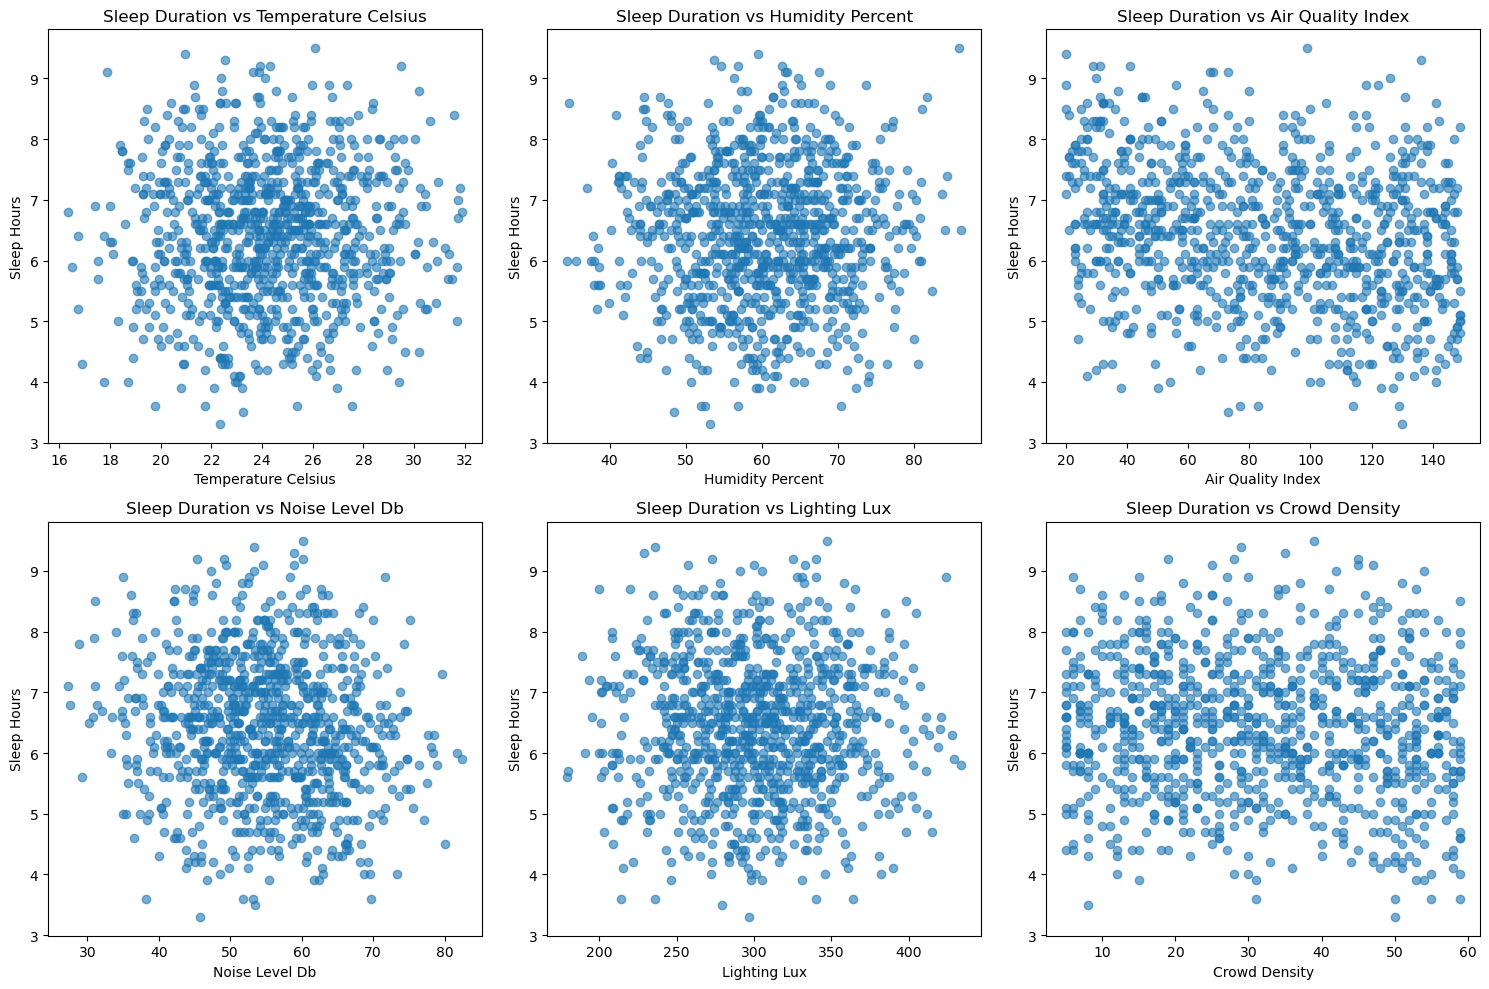

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, env_var in enumerate(environmental_vars):
    ax = axes[i]
    ax.scatter(mental_health_df[env_var], mental_health_df['sleep_hours'], alpha=0.6)
    ax.set_xlabel(env_var.replace('_', ' ').title())
    ax.set_ylabel('Sleep Hours')
    ax.set_title(f'Sleep Duration vs {env_var.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

The analysis, combining both scatter plot visualizations and correlation data, indicates that there is no strong linear relationship between sleep duration and any single environmental factor. Most data points are concentrated around 6 to 8 hours of sleep across all variables—temperature, humidity, air quality, noise level, lighting, and crowd density—suggesting that sleep duration remains relatively stable despite fluctuations in these conditions. This visual trend is supported by the low correlation values, with all factors showing weak associations with sleep duration. The only moderately notable relationship is a negative correlation between air quality index and sleep duration (−0.240), implying that poorer air quality may slightly reduce sleep duration. Noise level (−0.115) and crowd density (−0.079) also show minor negative associations, while temperature (0.025), humidity (0.017), and lighting (−0.020) have negligible effects. Overall, the findings suggest that while environmental conditions may have some influence—especially in the case of air quality—their individual impact on sleep duration is generally limited, and sleep is likely shaped by a more complex interplay of factors beyond the environment alone.

### __2.2 What distinct environmental-sleep pattern clusters emerge from the data, and what characterizes each cluster?__

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

env_vars = ['temperature_celsius', 'humidity_percent', 'air_quality_index', 
           'noise_level_db', 'lighting_lux', 'crowd_density']

scaler = StandardScaler()
env_scaled = scaler.fit_transform(mental_health_df[env_vars])

kmeans = KMeans(n_clusters=3, random_state=42)
mental_health_df['env_cluster'] = kmeans.fit_predict(env_scaled)

sleep_by_cluster = mental_health_df.groupby('env_cluster')['sleep_hours'].agg(['mean', 'std', 'count'])
print(sleep_by_cluster)

                 mean       std  count
env_cluster                           
0            6.278361  1.130611    305
1            6.736313  1.139767    358
2            6.199317  1.068990    293


In [ ]:
clustering_features = ['sleep_hours'] + env_vars
cluster_data = scaler.fit_transform(mental_health_df[clustering_features])
kmeans_sleep = KMeans(n_clusters=4, random_state=42)
mental_health_df['sleep_env_cluster'] = kmeans_sleep.fit_predict(cluster_data)

While clusters were formed using all environmental variables, we visualize using air quality index as it showed the strongest correlation with sleep duration (-0.240) in our previous analysis.

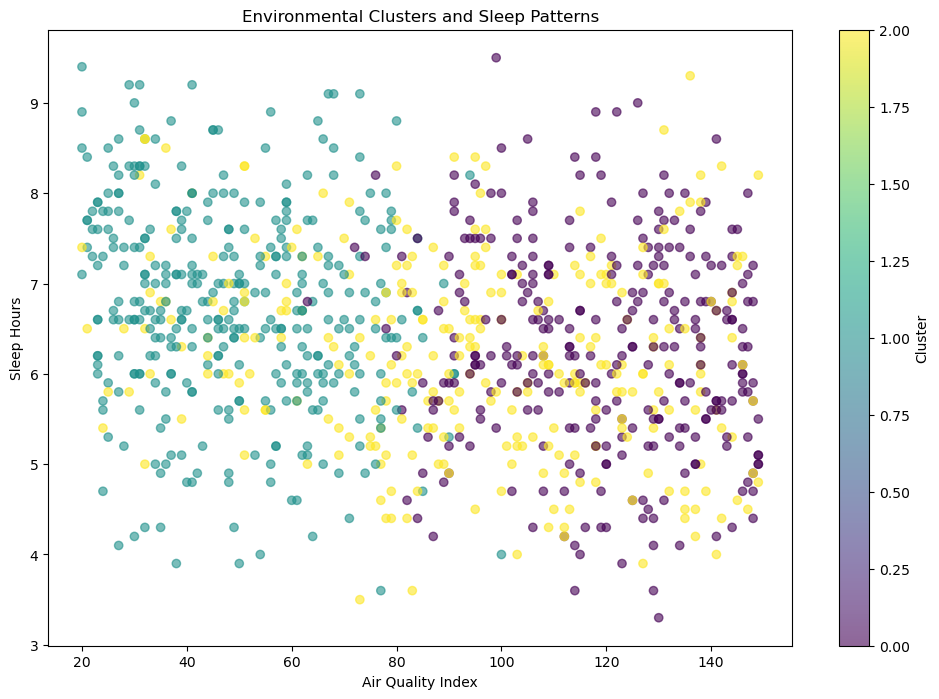

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(mental_health_df['air_quality_index'], 
                     mental_health_df['sleep_hours'],
                     c=mental_health_df['env_cluster'], 
                     cmap='viridis', alpha=0.6)
plt.xlabel('Air Quality Index')
plt.ylabel('Sleep Hours')
plt.title('Air Quality Index and Sleep Patterns')
plt.colorbar(scatter, label='Cluster')
plt.show()

The analysis reveals that environmental factors have weak relationships with sleep duration, with the strongest correlation being air quality index at -0.240. Due to these weak correlations, no specific environmental thresholds can be reliably identified that significantly impact student sleep patterns. While clustering analysis shows distinct environmental profiles, the limited correlation strength suggests that sleep duration is likely influenced by factors beyond the environmental conditions measured in this dataset. Campus location also shows no significant difference in sleep duration patterns.

### __2.3 Does sleep duration differ across different campus locations?__

Before conducting the test, we formulate the following hypotheses:

$H_0$ (null hypothesis): The sleep duration is not significantly different across all campus locations.

$H_A$ (alternative hypothesis): The sleep duration is significantly different across all campus locations.

Sleep Duration by Location:
                 mean       std  count
location_id                           
101          6.423902  1.150944    205
102          6.361111  1.149223    180
103          6.593296  1.112776    179
104          6.415306  1.163051    196
105          6.343878  1.119255    196


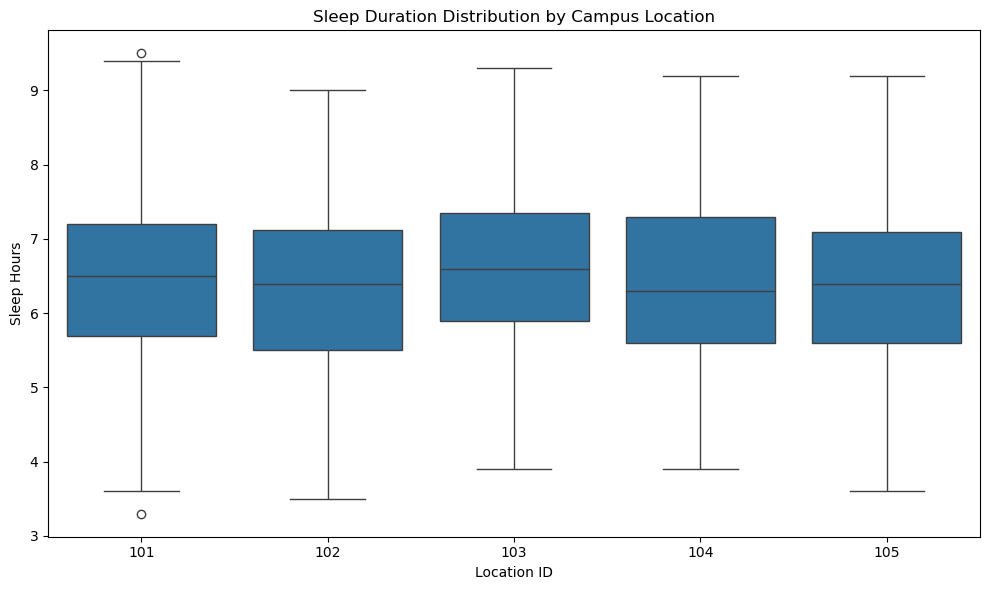

F stat: 1.3691604560264699
P value: 0.24267486179166142


In [29]:
sleep_by_location = mental_health_df.groupby('location_id', observed=True)['sleep_hours'].agg(['mean', 'std', 'count'])
print("Sleep Duration by Location:")
print(sleep_by_location)

plt.figure(figsize=(10, 6))
sns.boxplot(data=mental_health_df, x='location_id', y='sleep_hours')
plt.title('Sleep Duration Distribution by Campus Location')
plt.xlabel('Location ID')
plt.ylabel('Sleep Hours')
plt.tight_layout()
plt.show()

from scipy.stats import f_oneway

grouped_sleep = [group['sleep_hours'].values for _, group in mental_health_df.groupby('location_id', observed=False)]
f_stat, p_value = f_oneway(*grouped_sleep)
print(f"F stat: {f_stat}")
print(f"P value: {p_value}")

Based on the one-way ANOVA results (F-statistic = 1.37, p-value = 0.243), we fail to reject the null hypothesis at the 0.05 significance level. This indicates that there is no statistically significant difference in sleep duration across different campus locations.

Key Findings:
- Sleep duration remains relatively consistent across all five campus locations (101-105)
- The p-value of 0.243 is well above the significance threshold of 0.05
- Location-specific factors do not appear to significantly influence student sleep patterns

Implication for Research Question 2: This finding supports the broader conclusion that environmental factors have limited impact on sleep duration. Since sleep duration doesn't vary significantly by location, and locations represent different environmental contexts, this reinforces that:

Sleep duration is relatively stable across different campus environments
Environmental factors measured in this study (temperature, humidity, air quality, noise, lighting, crowd density) do not create location-specific sleep disruptions
Individual factors (personal sleep habits, academic schedules, lifestyle choices) likely play a more significant role in determining sleep duration than environmental conditions
Overall: The analysis confirms that campus location is not a significant predictor of sleep duration, aligning with the weak environmental correlations found in previous analyses and suggesting that sleep patterns are primarily driven by factors beyond the measured environmental conditions.